## Loading Data

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
df=load_boston()
data=pd.DataFrame(df.data, columns=df.feature_names)
data['Price']=df.target

X=data.iloc[:,:-1]
y=data.loc[:,'Price']

data.head(20)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


## Linear regression

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

X=data.iloc[:,:-1]
y=data.loc[:,'Price']

linear_model = LinearRegression()

linear=cross_val_score(linear_model,X,y,scoring='neg_mean_squared_error',cv=5)
mean_linear=np.mean(linear)
print(mean_linear)



-37.13180746769897


## Ridge regression

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

lambda_range = np.linspace(0.1,100,1000)
lambda_grid = [{'alpha': lambda_range}]

ridge_model = Ridge()

cv_ridge = GridSearchCV(estimator=ridge_model, param_grid=lambda_grid, scoring='neg_mean_squared_error',cv=5)
cv_ridge.fit(X, y)
print(cv_ridge.best_params_)
print(cv_ridge.best_score_)


{'alpha': 100.0}
-29.905701947540376


## Lasso regression

In [9]:
from sklearn.linear_model import Lasso

lasso_model = Lasso()

cv_lasso = GridSearchCV(estimator=lasso_model, param_grid=lambda_grid, scoring='neg_mean_squared_error',cv=5)
cv_lasso.fit(X, y)

print(cv_lasso.best_params_)
print(cv_lasso.best_score_)



{'alpha': 0.30000000000000004}
-34.45504243875093


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0,test_size=0.3)
lasso_predictions = cv_ridge.predict(X_test)
ridge_predictions = cv_lasso.predict(X_test)

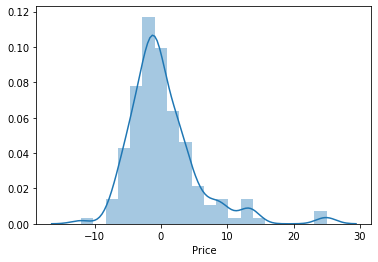

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(y_test-lasso_predictions)

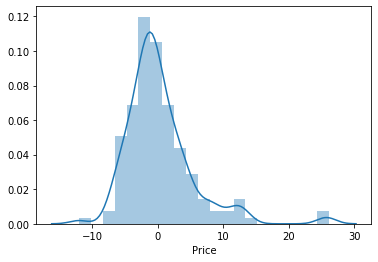

In [17]:
sns.distplot(y_test-ridge_predictions
            )